In [1]:
#Import numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

#Regresstion Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#Classification Estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Cross Validation
from sklearn.model_selection import train_test_split

#Visualization
from sklearn.tree import plot_tree

#helpers
%matplotlib inline

In [2]:
credit = pd.read_csv('data3.csv')
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
6,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
7,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
8,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
9,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   29965 non-null  int64 
 1   SEX                         29965 non-null  object
 2   EDUCATION                   29965 non-null  object
 3   MARRIAGE                    29965 non-null  int64 
 4   AGE                         29965 non-null  int64 
 5   PAY_0                       29965 non-null  int64 
 6   PAY_2                       29965 non-null  int64 
 7   PAY_3                       29965 non-null  int64 
 8   PAY_4                       29965 non-null  int64 
 9   PAY_5                       29965 non-null  int64 
 10  PAY_6                       29965 non-null  int64 
 11  BILL_AMT1                   29965 non-null  int64 
 12  BILL_AMT2                   29965 non-null  int64 
 13  BILL_AMT3                   29965 non-null  in

In [4]:
credit2 = credit.copy()
credit2.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
6,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
7,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
8,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
9,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [5]:
credit2['EDUCATION']=credit2['EDUCATION'].replace({"high school": 1, "university": 2, "graduate school": 3, "other": 4})
#covert to 1: high school, 2: university, 3: graduate school, 4: other
credit2.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
5,50000,male,3,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
6,500000,male,3,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
7,100000,female,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
8,140000,female,1,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
9,20000,male,1,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [6]:
credit2['SEX']=credit2['SEX'].replace({"female": 0, "male": 1})
#0: female, 1: male

credit2['default payment next month']=credit2['default payment next month'].replace({"default": 1, "not default": 0})
#0: not default, 1: default

credit2.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,3,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,3,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,0,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,0,1,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,1,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
#Discretize 'age' 
#The min. age is 21 and the max. age is 79
#Label age_bins
age_bins = ([1, 9, 19, 29, 39, 49, 59, 69, 79])

credit2['age_bin'] = pd.cut(credit2['AGE'], bins=age_bins, labels = False)

credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29965 non-null  int64
 1   SEX                         29965 non-null  int64
 2   EDUCATION                   29965 non-null  int64
 3   MARRIAGE                    29965 non-null  int64
 4   AGE                         29965 non-null  int64
 5   PAY_0                       29965 non-null  int64
 6   PAY_2                       29965 non-null  int64
 7   PAY_3                       29965 non-null  int64
 8   PAY_4                       29965 non-null  int64
 9   PAY_5                       29965 non-null  int64
 10  PAY_6                       29965 non-null  int64
 11  BILL_AMT1                   29965 non-null  int64
 12  BILL_AMT2                   29965 non-null  int64
 13  BILL_AMT3                   29965 non-null  int64
 14  BILL_A

In [8]:
credit2['BILL_AMT'] = credit2[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
credit2['PAY_AMT'] = credit2[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
credit2['PAY_m'] = credit2[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
credit2.info()
credit2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  int64  
 12  BILL_AMT2                   29965 non-null  int64  
 13  BILL_AMT3                   299

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bin,BILL_AMT,PAY_AMT,PAY_m
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,2.219723,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258,3.086000,45029.328116,5281.297308,-0.180978
std,129760.135222,0.489128,0.728525,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.974021,63279.074163,10142.306855,0.981368
min,10000.000000,0.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-56043.166667,0.000000,-2.000000
25%,50000.000000,0.000000,2.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000,2.000000,4841.000000,1116.666667,-0.833333
50%,140000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000,3.000000,21110.833333,2400.000000,0.000000
75%,240000.000000,1.000000,3.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000,4.000000,57166.166667,5600.000000,0.000000
max,1000000.000000,1.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,7.000000,877313.833333,627344.333333,6.000000


In [9]:
#Discretize 'PAY_m' repayment status
#The min. is -2 and the max. is 6

PAY_bins = ([-3, -2, -1, 0, 6])

#0:(-3,-2], 1:(-2,-1], 2:(-1,0], 3:(0,6]
#0: No consumption; 1: Paid in full; 2: The use of revolving credit; 3 = payment delay for 1 month and above 

credit2['repay_m'] = pd.cut(credit2['PAY_m'], bins=PAY_bins, labels = False)

credit2.info()

credit2['repay_m'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  int64  
 12  BILL_AMT2                   29965 non-null  int64  
 13  BILL_AMT3                   299

count    29965.000000
mean         1.936526
std          0.821981
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: repay_m, dtype: float64

In [10]:
credit2['PAY_s'] = credit2[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].sum(axis=1)
credit2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bin,BILL_AMT,PAY_AMT,PAY_m,repay_m,PAY_s
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,2.219723,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,4831.617454,4804.897047,5221.498014,0.221258,3.086000,45029.328116,5281.297308,-0.180978,1.936526,-1.085867
std,129760.135222,0.489128,0.728525,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,15674.464538,15286.372298,17786.976864,0.415101,0.974021,63279.074163,10142.306855,0.981368,0.821981,5.888209
min,10000.000000,0.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,-56043.166667,0.000000,-2.000000,0.000000,-12.000000
25%,50000.000000,0.000000,2.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,300.000000,261.000000,131.000000,0.000000,2.000000,4841.000000,1116.666667,-0.833333,2.000000,-5.000000
50%,140000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,3.000000,21110.833333,2400.000000,0.000000,2.000000,0.000000
75%,240000.000000,1.000000,3.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4016.000000,4042.000000,4000.000000,0.000000,4.000000,57166.166667,5600.000000,0.000000,2.000000,0.000000
max,1000000.000000,1.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,528666.000000,1.000000,7.000000,877313.833333,627344.333333,6.000000,3.000000,36.000000


In [11]:
#Discretize 'PAY_s' repayment status
#The min. is -12 and the max. is 36

PAY_bins = ([-13, -6, 0, 6, 36])

#0:(-13,-6], 1:(-6,0], 2:(0,6], 3:(6,36]
#0:No consumption; 1: Paid in full; 2: The use of revolving credit; 3: payment delay for 1 month and above

credit2['repay_s'] = pd.cut(credit2['PAY_s'], bins=PAY_bins, labels = False)

credit2.info()
credit2.head(10)
credit2['repay_s'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  int64  
 12  BILL_AMT2                   29965 non-null  int64  
 13  BILL_AMT3                   299

count    29965.000000
mean         1.094444
std          0.850897
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: repay_s, dtype: float64

C:\Users\mhsua\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


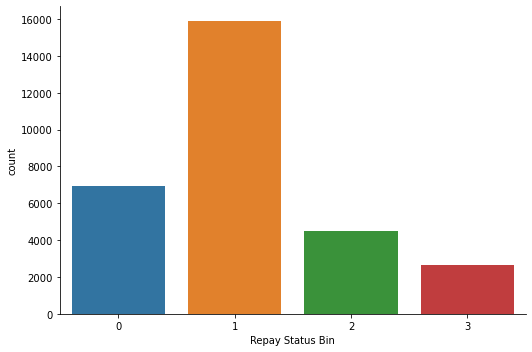

In [12]:
fg = sns.catplot('repay_s', data=credit2, kind ='count', aspect=1.5)
fg.set_xlabels('Repay Status Bin')
#0:No consumption; 1: Paid in full; 2: The use of revolving credit; 3: payment delay for 1 month and above

## Set 'LIMIT_BAL' as the dependent variable and do 'regression' machine learning

In [13]:
#features; set limit balance as dependent variable and do regression machine learning
X = credit2.drop(['LIMIT_BAL','AGE'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,default payment next month,age_bin,BILL_AMT,PAY_AMT,PAY_m,repay_m,PAY_s,repay_s
0,0,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,1,2,1284.000000,114.833333,-0.333333,2,-2,1
1,0,2,2,-1,2,0,0,0,2,2682,...,0,2000,1,2,2846.166667,833.333333,0.500000,3,3,2
2,0,2,2,0,0,0,0,0,0,29239,...,1000,5000,0,3,16942.166667,1836.333333,0.000000,2,0,1
3,0,2,1,0,0,0,0,0,0,46990,...,1069,1000,0,3,38555.666667,1398.000000,0.000000,2,0,1
4,1,2,1,-1,0,-1,0,0,0,8617,...,689,679,0,5,18223.166667,9841.500000,-0.333333,2,-2,1


In [14]:
y = credit2['LIMIT_BAL']
y.describe()

algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass.append(('Decision Tree Regression',DecisionTreeRegressor()))

#regression
results = []
names = []

for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4501395732745696
Linear Regression 0.3562863294522945
Support Vector Regression -0.05035772395078101
Decision Tree Regression -0.08889933618193029


In [15]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Select RandomForestRegressor as the best model to train the model and make predictions
model = RandomForestRegressor()
model.fit(X_train,y_train)

#Predictions
preds = model.predict(X_test)
Rsquared = r2_score(y_test, preds)
rmse = sqrt(mean_squared_error(y_test, preds))

print('R Squared: %.3f' % Rsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.451
RMSE: 95948.508


C:\Users\mhsua\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LIMIT_BAL'>

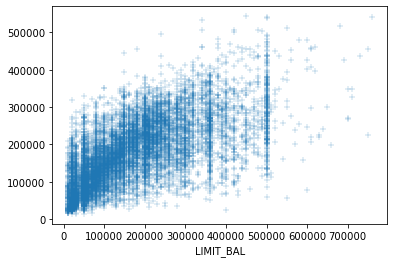

In [16]:
sns.scatterplot(y_test, preds, marker="+", alpha=0.5)

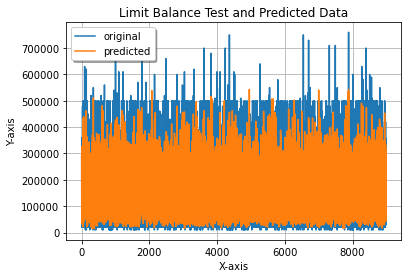

In [17]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, preds, label="predicted")
plt.title("Limit Balance Test and Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [18]:
#Cross Validation
model = RandomForestRegressor()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.45491881 0.46227004 0.43189685]


In [19]:
#features; set limit balance as dependent variable and do regression machine learning
X = credit2.drop(['LIMIT_BAL','age_bin','BILL_AMT','PAY_AMT','PAY_m','repay_m','PAY_s','repay_s'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,0,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
y = credit2['LIMIT_BAL']

algosClass = []
algosClass.append(('Random Forest Regression',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass.append(('Decision Tree Regression',DecisionTreeRegressor()))

#regression
results = []
names = []

for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regression 0.4667327623151312
Linear Regression 0.35017856758149657
Support Vector Regression -0.0503006785050919
Decision Tree Regression -0.09031350315800617


In [21]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Select RandomForestRegressor as the best model to train the model and make predictions
model = RandomForestRegressor(max_depth=10, random_state=123)
model.fit(X_train,y_train)

#Modeling (Classification)
#RFR_algo = RandomForestRegressor()
#RFR_model = RFR_algo.fit(X_train, y_train)

#Predictions
preds = model.predict(X_test)
Rsquared = r2_score(y_test, preds)
rmse = sqrt(mean_squared_error(y_test, preds))

print('R Squared: %.3f' % Rsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.476
RMSE: 93781.668


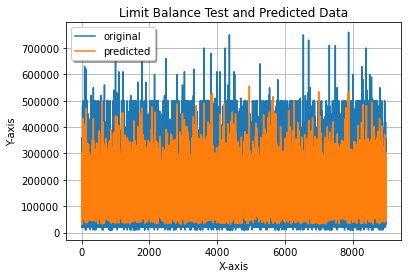

In [22]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, preds, label="predicted")
plt.title("Limit Balance Test and Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Set 'LIMIT_BAL' as dependent variable and do Classification machine learning

In [23]:
#bin credit limit: 0 = (1,9999], 1 = (9999,50000], 2 = (50000,100000], 3 = (100000,250000], 4 = (250000,10000000]

#0 = below 10000, 1 = 10000-50000, 2 = 50001-100000, 3 = 100001-250000, 4 = 250001-1000000
#limit_bal min: 10000, max: 1000000
credit_bin = ([1, 9999, 50000, 100000, 250000, 1000000])

credit2['credit_bin'] = pd.cut(credit2['LIMIT_BAL'], bins=credit_bin, labels = False)

credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  int64  
 12  BILL_AMT2                   29965 non-null  int64  
 13  BILL_AMT3                   299

C:\Users\mhsua\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


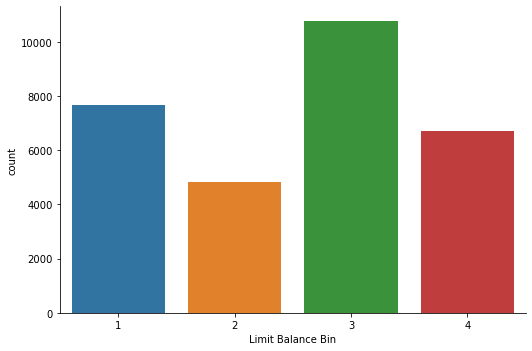

In [24]:
#bin credit limit: 0 = (1,9999], 1 = (9999,50000], 2 = (50000,100000], 3 = (100000,250000], 4 = (250000,10000000]

#0 = below 10000, 1 = 10000-50000, 2 = 50001-100000, 3 = 100001-250000, 4 = 250001-1000000
#limit_bal min: 10000, max: 1000000

fg = sns.catplot('credit_bin', data=credit2, kind ='count', aspect=1.5)
fg.set_xlabels('Limit Balance Bin')

In [25]:
credit2.groupby('credit_bin')['credit_bin'].count()

credit_bin
1     7673
2     4817
3    10767
4     6708
Name: credit_bin, dtype: int64

In [26]:
#features; set limit balance as dependent variable and do classification machine learning
X = credit2.drop(['LIMIT_BAL','credit_bin','AGE','PAY_m','PAY_s'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bin,BILL_AMT,PAY_AMT,repay_m,repay_s
0,0,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,2,1284.000000,114.833333,2,1
1,0,2,2,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,2,2846.166667,833.333333,3,2
2,0,2,2,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,3,16942.166667,1836.333333,2,1
3,0,2,1,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,3,38555.666667,1398.000000,2,1
4,1,2,1,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,5,18223.166667,9841.500000,2,1


In [27]:
y = credit2['credit_bin']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6003339122240178
Decision Tree Classifier 0.4948776486868167
Gradient Boosting Classifier 0.6102453922115021


In [28]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Modeling (Classification)
RFC_algo = RandomForestClassifier()
RFC_model = RFC_algo.fit(X_train, y_train)

#Predictions
preds = RFC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.69      0.81      0.75      2287
           2       0.55      0.38      0.45      1420
           3       0.56      0.66      0.61      3243
           4       0.59      0.44      0.50      2040

    accuracy                           0.60      8990
   macro avg       0.60      0.57      0.58      8990
weighted avg       0.60      0.60      0.59      8990



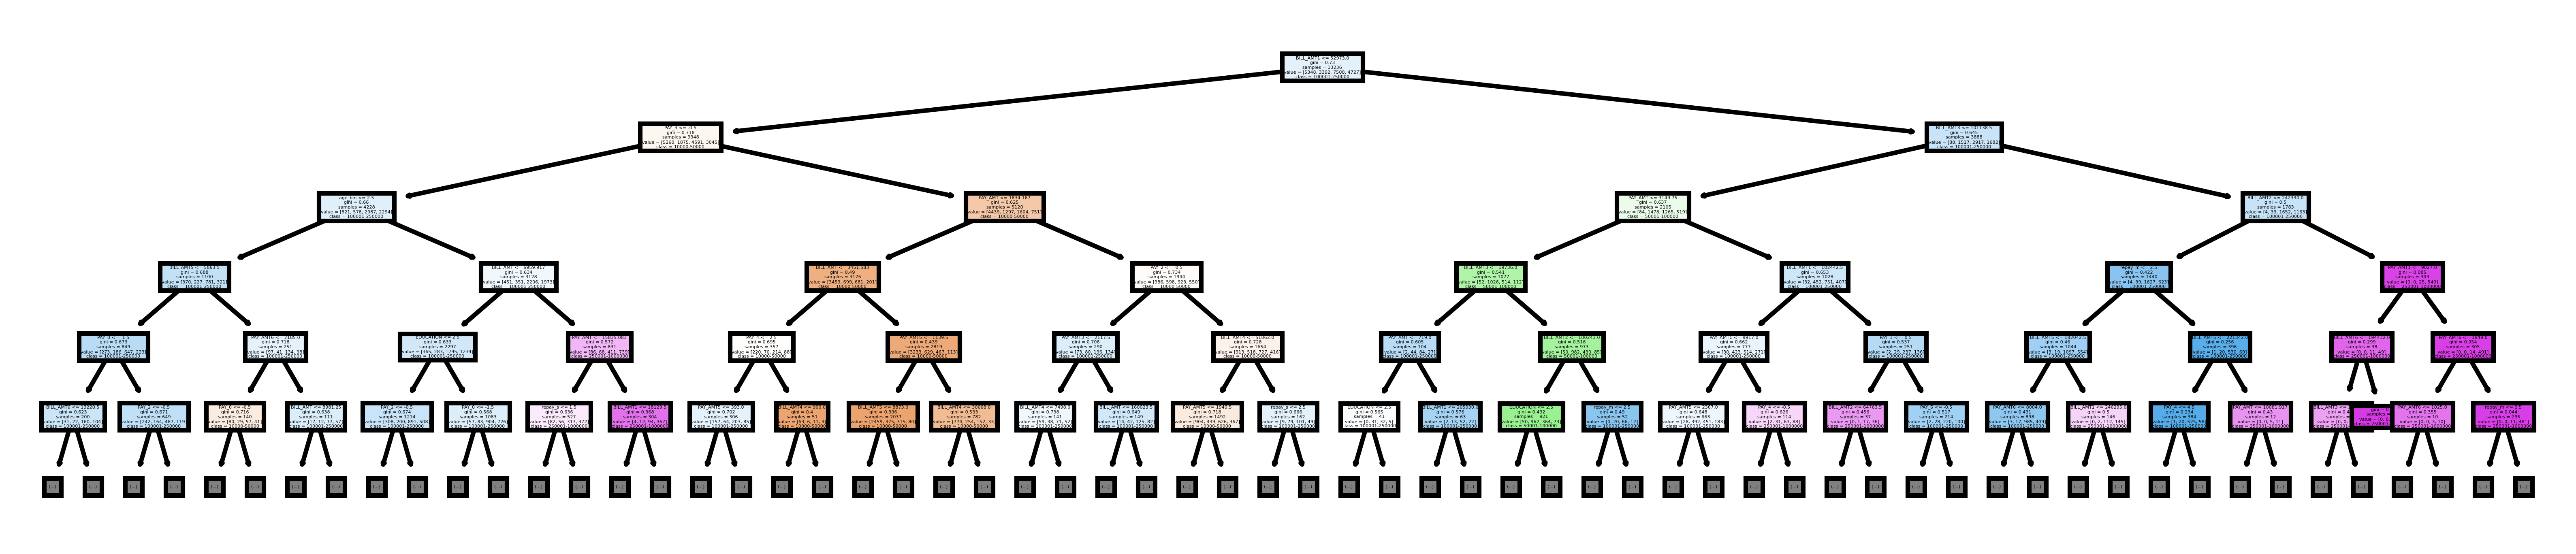

In [29]:
#bin credit limit: 0 = (1,9999], 1 = (9999,50000], 2 = (50000,100000], 3 = (100000,250000], 4 = (250000,10000000]

#0 = below 10000, 1 = 10000-50000, 2 = 50001-100000, 3 = 100001-250000, 4 = 250001-1000000
#limit_bal min: 10000, max: 1000000
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,2), dpi=800)
tree = plot_tree(RFC_model.estimators_[0],
               feature_names = X.columns, 
               class_names=['10000-50000', '50001-100000','100001-250000','250001-1000000'],
               filled = True, max_depth=5);
fig.savefig('credit0_25_60.tif')

In [30]:
#bin credit limit: 0 = (1,9999], 1 = (9999,10000], 2 = (10000,100000], 3 = (100000,500000], 4 = (500000,1000000]

#0 = below 10000, 1 = 10000, 2 = 10001-100000, 3 = 100001-500000, 4 = 500001-1000000
#limit_bal min: 10000, max: 1000000
credit_bin = ([1, 9999, 10000, 100000, 500000, 1000000])

credit2['credit_bin'] = pd.cut(credit2['LIMIT_BAL'], bins=credit_bin, labels = False)

credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  int64  
 12  BILL_AMT2                   29965 non-null  int64  
 13  BILL_AMT3                   299

In [31]:
#features; set limit balance as dependent variable and do classification machine learning
X = credit2.drop(['LIMIT_BAL','credit_bin','AGE','PAY_m','PAY_s'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bin,BILL_AMT,PAY_AMT,repay_m,repay_s
0,0,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,2,1284.000000,114.833333,2,1
1,0,2,2,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,2,2846.166667,833.333333,3,2
2,0,2,2,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,3,16942.166667,1836.333333,2,1
3,0,2,1,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,3,38555.666667,1398.000000,2,1
4,1,2,1,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,5,18223.166667,9841.500000,2,1


In [32]:
y = credit2['credit_bin']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7958617281038244
Decision Tree Classifier 0.7188719265200532
Gradient Boosting Classifier 0.7984647950550973


In [33]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Modeling (Classification)
RFC_algo = RandomForestClassifier()
RFC_model = RFC_algo.fit(X_train, y_train)

#Predictions
preds = RFC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.56      0.32      0.41       139
           2       0.76      0.75      0.76      3620
           3       0.82      0.85      0.84      5170
           4       0.50      0.02      0.03        61

    accuracy                           0.80      8990
   macro avg       0.66      0.48      0.51      8990
weighted avg       0.79      0.80      0.79      8990



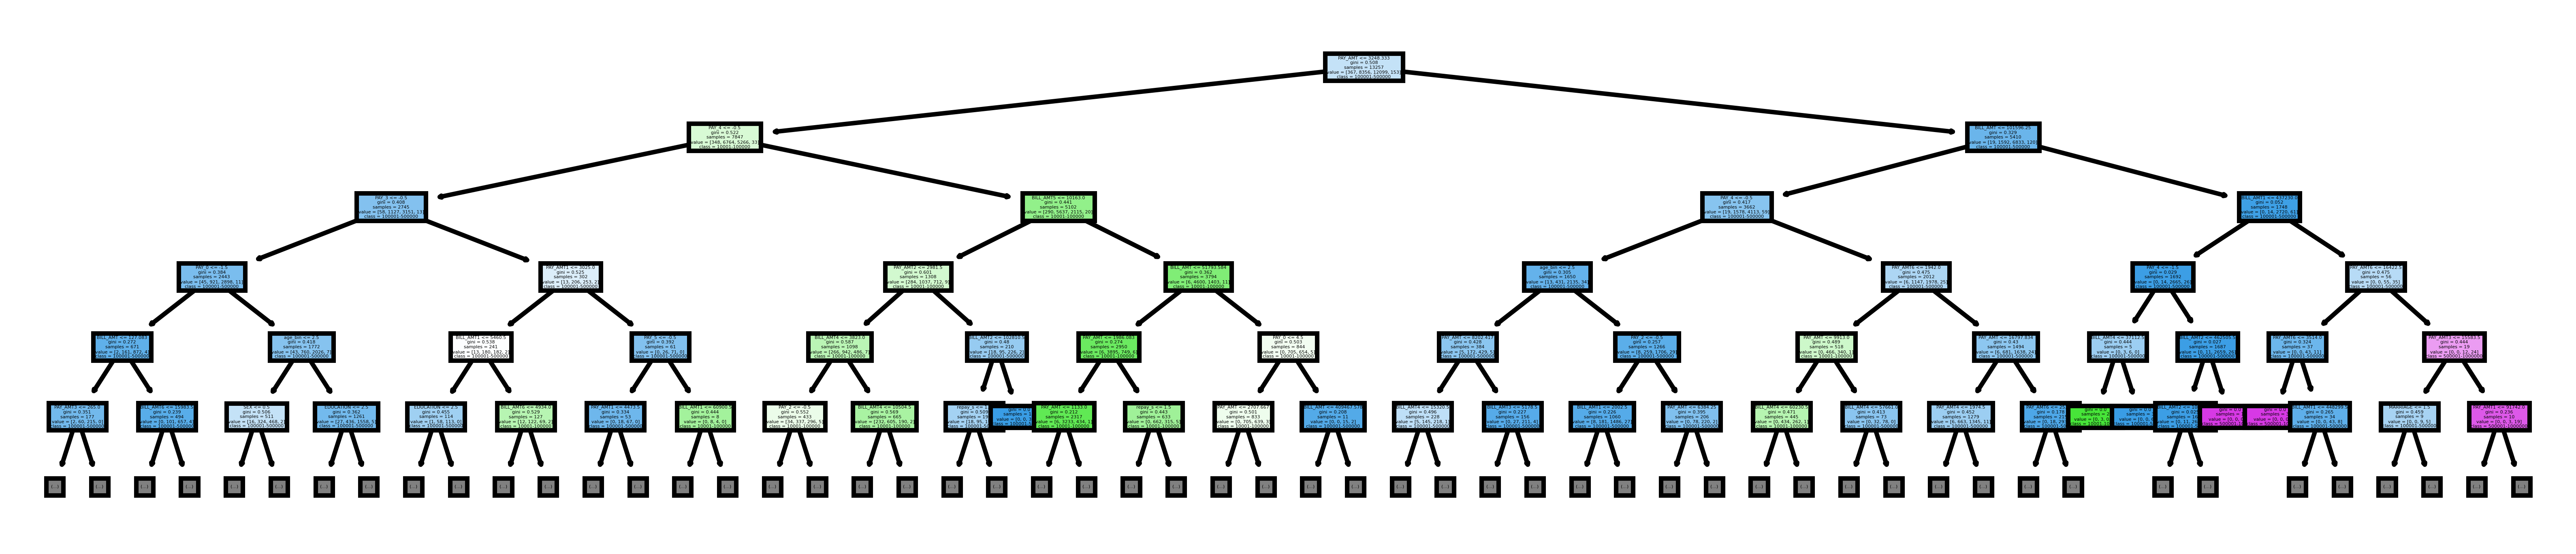

In [34]:
from sklearn.tree import plot_tree

#0 = below 10000, 1 = 10000, 2 = 10001-100000, 3 = 100001-500000, 4 = 500001-1000000
#limit_bal min: 10000, max: 1000000
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,2), dpi=800)
tree = plot_tree(RFC_model.estimators_[0],
               feature_names = X.columns, 
               class_names=['10000', '10001-100000','100001-500000','500001-1000000'],
               filled = True, max_depth=5);
fig.savefig('credit0_50_80.tif')

C:\Users\mhsua\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


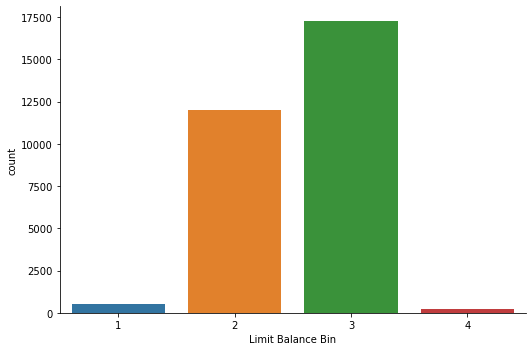

In [35]:
#bin credit limit: 0 = (1,9999], 1 = (9999,10000], 2 = (10000,100000], 3 = (100000,500000], 4 = (500000,1000000]

#0 = below 10000, 1 = 10000, 2 = 10001-100000, 3 = 100001-500000, 4 = 500001-1000000
#limit_bal min: 10000, max: 1000000

fg = sns.catplot('credit_bin', data=credit2, kind ='count', aspect=1.5)
fg.set_xlabels('Limit Balance Bin')

In [36]:
credit2.groupby('credit_bin')['credit_bin'].count()

credit_bin
1      493
2    11997
3    17269
4      206
Name: credit_bin, dtype: int64

In [37]:
#Bin BILL_AMT and PAY_AMT

#BILL_AMT min: -56044, max: 877314, median: 21110, avg: 45030
bill_bin = ([-60000, 1000, 10000, 50000, 1000000])
#bill amount bin: 0=(-60000,1000], 1=(1001,10000], 2=(10000,50000], 3=(50000,1000000]
#0 = -60000-0, 1 = 1-10000, 2 = 10001-50000, 3 = 50001-1000000


#PAY_AMT min: 0, max: 627345, median: 2400, avg: 5282
pay_bin = ([-1, 1000, 5000, 10000, 700000])
#pay amount bin: 0 = (-1,1000], 1 = (1000,5000], 2 = (5000,10000], 3 = (10000,700000]
#0 = 0-1000, 1 = 1001-5000, 2 = 5001-10000, 3 = 10001-700000


credit2['BillAMT_bin'] = pd.cut(credit2['BILL_AMT'], bins=bill_bin, labels = False)
credit2['PayAMT_bin'] = pd.cut(credit2['PAY_AMT'], bins=pay_bin, labels = False)

credit2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,age_bin,BILL_AMT,PAY_AMT,PAY_m,repay_m,PAY_s,repay_s,credit_bin,BillAMT_bin,PayAMT_bin
0,20000,0,2,1,24,2,2,-1,-1,-2,...,2,1284.000000,114.833333,-0.333333,2,-2,1,2,1,0
1,120000,0,2,2,26,-1,2,0,0,0,...,2,2846.166667,833.333333,0.500000,3,3,2,3,1,0
2,90000,0,2,2,34,0,0,0,0,0,...,3,16942.166667,1836.333333,0.000000,2,0,1,2,2,1
3,50000,0,2,1,37,0,0,0,0,0,...,3,38555.666667,1398.000000,0.000000,2,0,1,2,2,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,5,18223.166667,9841.500000,-0.333333,2,-2,1,2,2,2


C:\Users\mhsua\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


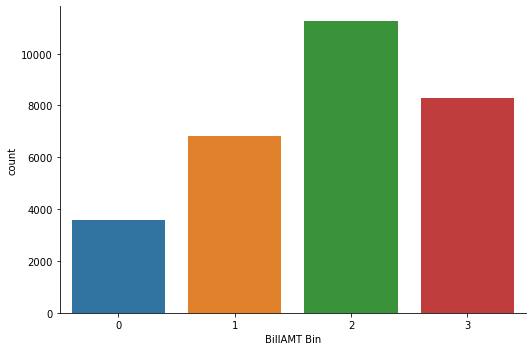

In [38]:
fg = sns.catplot('BillAMT_bin', data=credit2, kind ='count', aspect=1.5)
fg.set_xlabels('BillAMT Bin')

C:\Users\mhsua\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


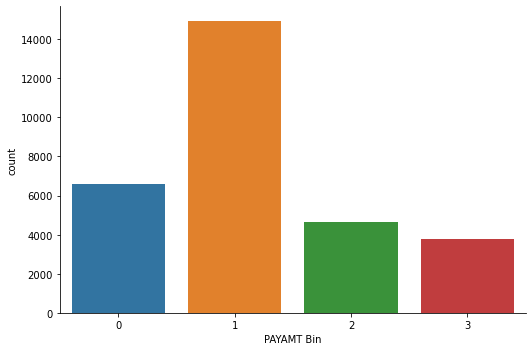

In [39]:
fg = sns.catplot('PayAMT_bin', data=credit2, kind ='count', aspect=1.5)
fg.set_xlabels('PAYAMT Bin')

In [40]:
#features; set limit balance as dependent variable and do classification machine learning
X = credit2.iloc[:,[1,2,3,23,24,28,30,32,33]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,default payment next month,age_bin,repay_m,repay_s,BillAMT_bin,PayAMT_bin
0,0,2,1,1,2,2,1,1,0
1,0,2,2,1,2,3,2,1,0
2,0,2,2,0,3,2,1,2,1
3,0,2,1,0,3,2,1,2,1
4,1,2,1,0,5,2,1,2,2


In [41]:
y = credit2['credit_bin']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7492740947093598
Decision Tree Classifier 0.7424661253663905
Gradient Boosting Classifier 0.764224855056488


In [42]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Modeling (Classification)
RFC_algo = RandomForestClassifier()
RFC_model = RFC_algo.fit(X_train, y_train)

#Predictions
preds = RFC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.24      0.12      0.16       139
           2       0.73      0.68      0.70      3620
           3       0.78      0.84      0.81      5170
           4       0.00      0.00      0.00        61

    accuracy                           0.76      8990
   macro avg       0.44      0.41      0.42      8990
weighted avg       0.74      0.76      0.75      8990



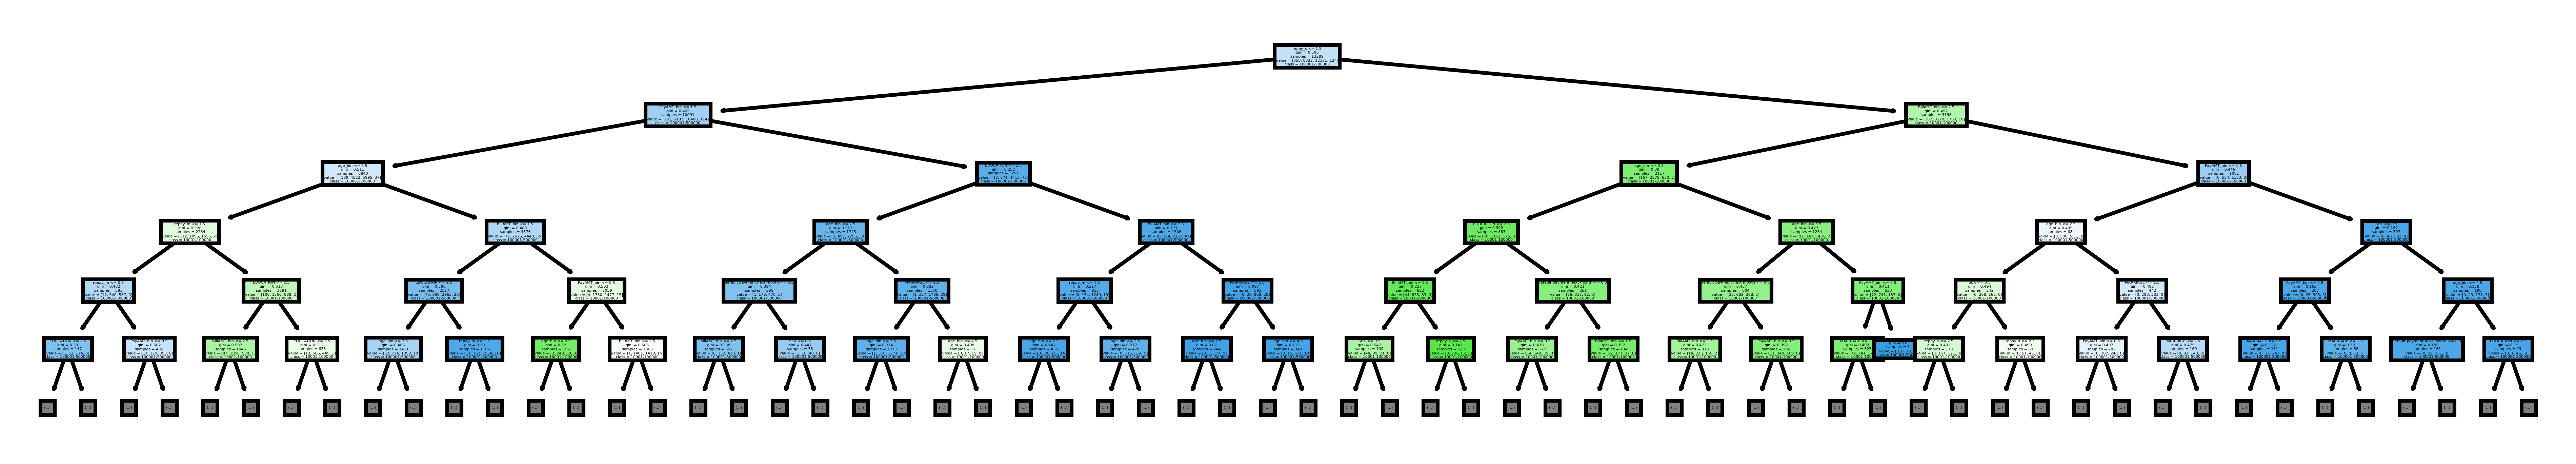

In [43]:
#credit bin: 0 = below 10000, 1 = 10000, 2 = 10001-100000, 3 = 100001-500000, 4 = 500001-1000000
#credit min: 10000, max: 1000000

#bill amount bin: 0=(-60000,0], 1=(0,10000], 2=(10000,50000], 3=(50000,100000], 4=(100000,500000], 5=(500000,1000000]
#0 = -60000-0, 1 = 1-10000, 2 = 10001-50000, 3 = 50001-100000, 4 = 100001-500000, 5 = 500001-1000000

#pay amount bin: 0 = (-1,1000], 1 = (1000,5000], 2 = (5000,10000], 3 = (10000,50000], 4 = (50000,100000], 5 = (100000,700000]
#0 = 0-1000, 1 = 1001-5000, 2 = 5001-10000, 3 = 10001-50000, 4 = 50001-100000, 5 = 100001-700000

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,2), dpi=800)
tree = plot_tree(RFC_model.estimators_[0],
               feature_names = X.columns, 
               class_names=['10000', '10001-100000','100001-500000','500001-1000000'],
               filled = True, max_depth=5);
fig.savefig('credit0_billpaybin50_76.tif')

In [44]:
#bin credit limit: 0 = (1,9999], 1 = (9999,10000], 2 = (10000,100000], 3 = (100000,1000000]
#0 = below, 1 = 10000, 2 = 10001-100000; 3 = 100001 and above
#limit_bal min: 10000, max: 1000000
credit_bin = ([1, 9999, 10000, 100000, 1000000])

credit2['credit_bin'] = pd.cut(credit2['LIMIT_BAL'], bins=credit_bin, labels = False)

credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  int64  
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  int64  
 12  BILL_AMT2                   29965 non-null  int64  
 13  BILL_AMT3                   299

In [45]:
#features; set limit balance as dependent variable and do classification machine learning
X = credit2.iloc[:,[1,2,3,23,24,28,32,33]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,default payment next month,age_bin,repay_m,BillAMT_bin,PayAMT_bin
0,0,2,1,1,2,2,1,0
1,0,2,2,1,2,3,1,0
2,0,2,2,0,3,2,2,1
3,0,2,1,0,3,2,2,1
4,1,2,1,0,5,2,2,2


In [46]:
y = credit2['credit_bin']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7575170225627579
Decision Tree Classifier 0.7495076281947788
Gradient Boosting Classifier 0.7706990438113617


In [47]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Modeling (Classification)
RFC_algo = RandomForestClassifier()
RFC_model = RFC_algo.fit(X_train, y_train)

#Predictions
preds = RFC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.18      0.06      0.09       144
           2       0.71      0.70      0.71      3563
           3       0.80      0.82      0.81      5283

    accuracy                           0.76      8990
   macro avg       0.56      0.53      0.54      8990
weighted avg       0.76      0.76      0.76      8990



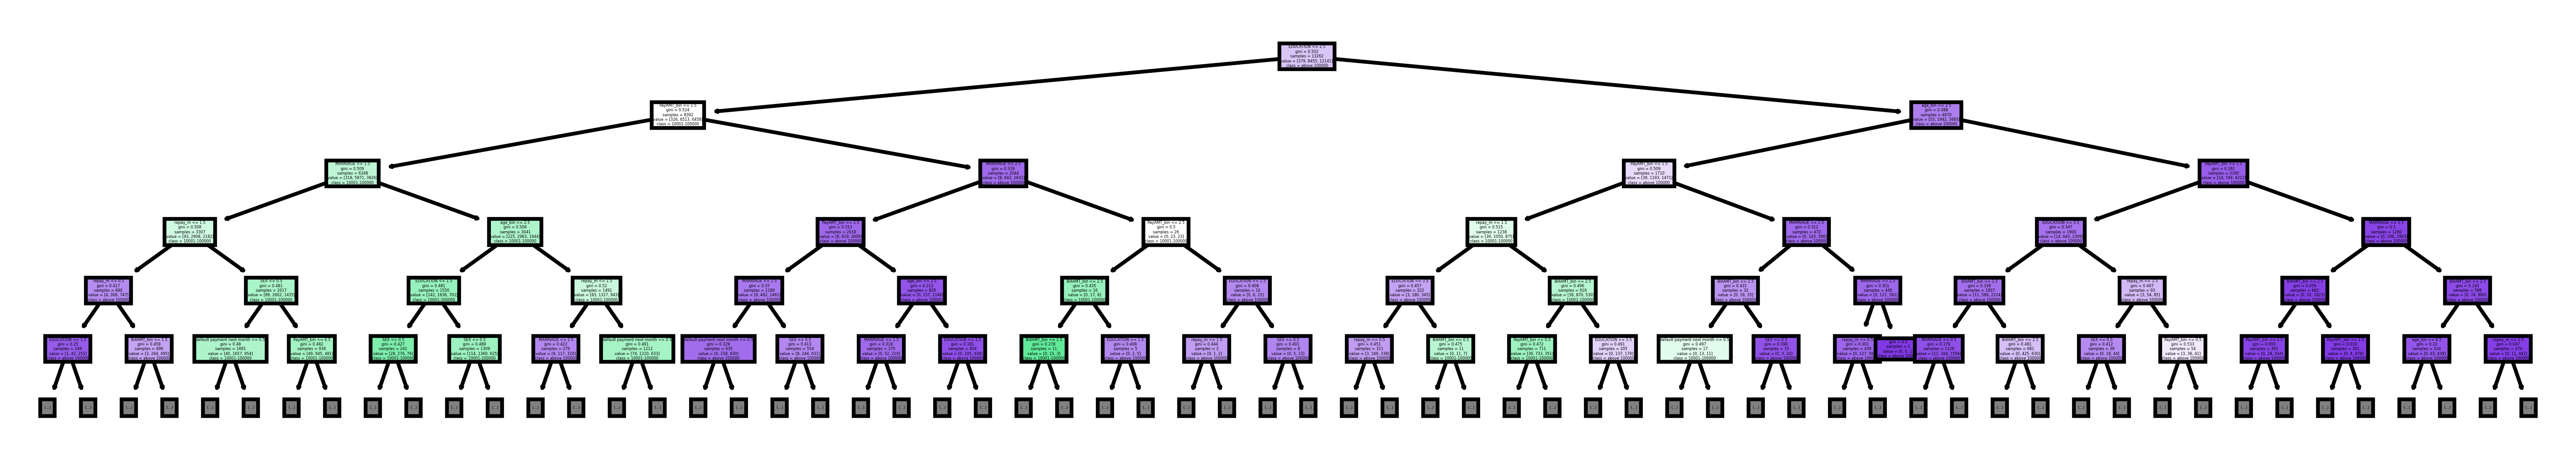

In [48]:
#Plotting

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,2), dpi=600)
tree = plot_tree(RFC_model.estimators_[9],
               feature_names = X.columns, 
               class_names=['10000', '10001-100000','above 100000'],
               filled = True, max_depth=5);
fig.savefig('credit9_billpaybin100_76.tif')

#EDUCATION
#1: high school, 2: university, 3: graduate school, 4: other

#SEX
#0: female, 1: male

#MARRIAGE
#0: other, 1: married, 2: single, 3: divorced

#Repayment Status
#0: No consumption; 1: Paid in full; 2: The use of revolving credit; 3 = payment delay for 1 month and above 

#Credit Balance
#1 = 10000, 2 = 10001-100000; 3 = 100001 and above

In [49]:
#features; set limit balance as dependent variable and do classification machine learning
X = credit2.drop(['LIMIT_BAL','credit_bin','AGE'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,age_bin,BILL_AMT,PAY_AMT,PAY_m,repay_m,PAY_s,repay_s,BillAMT_bin,PayAMT_bin
0,0,2,1,2,2,-1,-1,-2,-2,3913,...,1,2,1284.000000,114.833333,-0.333333,2,-2,1,1,0
1,0,2,2,-1,2,0,0,0,2,2682,...,1,2,2846.166667,833.333333,0.500000,3,3,2,1,0
2,0,2,2,0,0,0,0,0,0,29239,...,0,3,16942.166667,1836.333333,0.000000,2,0,1,2,1
3,0,2,1,0,0,0,0,0,0,46990,...,0,3,38555.666667,1398.000000,0.000000,2,0,1,2,1
4,1,2,1,-1,0,-1,0,0,0,8617,...,0,5,18223.166667,9841.500000,-0.333333,2,-2,1,2,2


In [50]:
y = credit2['credit_bin']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8009010719427199
Decision Tree Classifier 0.7288503604131411
Gradient Boosting Classifier 0.8071749869991152


In [51]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Modeling (Classification)
GBC_algo = GradientBoostingClassifier()
GBC_model = GBC_algo.fit(X_train, y_train)

#Predictions
preds = GBC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.72      0.42      0.53       144
           2       0.77      0.76      0.76      3563
           3       0.84      0.86      0.85      5283

    accuracy                           0.81      8990
   macro avg       0.78      0.68      0.71      8990
weighted avg       0.81      0.81      0.81      8990



In [52]:
#Cross Validation
model = GradientBoostingClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.80878967 0.81377653 0.79915899]


In [53]:
#features; set limit balance as dependent variable and do classification machine learning
X = credit2.drop(['LIMIT_BAL','credit_bin','AGE','PAY_m','PAY_s','repay_m','BillAMT_bin','PayAMT_bin'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bin,BILL_AMT,PAY_AMT,repay_s
0,0,2,1,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,2,1284.000000,114.833333,1
1,0,2,2,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,2,2846.166667,833.333333,2
2,0,2,2,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,3,16942.166667,1836.333333,1
3,0,2,1,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,3,38555.666667,1398.000000,1
4,1,2,1,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,5,18223.166667,9841.500000,1


In [54]:
y = credit2['credit_bin']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.803403941906515
Decision Tree Classifier 0.7314199170014796
Gradient Boosting Classifier 0.8072750703921424


In [55]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Modeling (Classification)
GBC_algo = GradientBoostingClassifier()
GBC_model = GBC_algo.fit(X_train, y_train)

#Predictions
preds = GBC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.71      0.42      0.53       144
           2       0.77      0.75      0.76      3563
           3       0.84      0.86      0.85      5283

    accuracy                           0.81      8990
   macro avg       0.77      0.68      0.71      8990
weighted avg       0.81      0.81      0.81      8990



In [56]:
#Cross Validation
model = GradientBoostingClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.80979077 0.81347617 0.79845815]


## Set 'DEFAULT Payment' as dependent variable and do 'classification' machine learning

In [57]:
#features; set default payment as dependent variable and do classification machine learning
X = credit2.iloc[:,[0,1,2,3,24,28,32,33]]
print('Summary of feature sample')
y = credit2['default payment next month']
X.head()
#0:No consumption; 1: Paid in full; 2: The use of revolving credit; 3: payment delay for 1 month and above

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,age_bin,repay_m,BillAMT_bin,PayAMT_bin
0,20000,0,2,1,2,2,1,0
1,120000,0,2,2,2,3,1,0
2,90000,0,2,2,3,2,2,1
3,50000,0,2,1,3,2,2,1
4,50000,1,2,1,5,2,2,2


In [58]:
#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7568831722102963
Decision Tree Classifier 0.7389956110979855
Gradient Boosting Classifier 0.7853163576717194


In [59]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Modeling (Classification)
RFC_algo = RandomForestClassifier()
RFC_model = RFC_algo.fit(X_train, y_train)

#Predictions
preds = RFC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      6996
           1       0.43      0.30      0.35      1994

    accuracy                           0.76      8990
   macro avg       0.62      0.59      0.60      8990
weighted avg       0.73      0.76      0.74      8990



In [60]:
#features; set default payment as dependent variable and do classification machine learning
X = credit2.iloc[:,[0,1,2,3,24,28]]
print('Summary of feature sample')
y = credit2['default payment next month']
X.head()
#0:No consumption; 1: Paid in full; 2: The use of revolving credit; 3: payment delay for 1 month and above

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,age_bin,repay_m
0,20000,0,2,1,2,2
1,120000,0,2,2,2,3
2,90000,0,2,2,3,2
3,50000,0,2,1,3,2
4,50000,1,2,1,5,2


In [61]:
#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7624228795581159
Decision Tree Classifier 0.7608209739564141
Gradient Boosting Classifier 0.7816788261507629


In [62]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Modeling (Classification)
RFC_algo = RandomForestClassifier()
RFC_model = RFC_algo.fit(X_train, y_train)

#Predictions
preds = RFC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      6996
           1       0.46      0.27      0.34      1994

    accuracy                           0.77      8990
   macro avg       0.64      0.59      0.60      8990
weighted avg       0.73      0.77      0.74      8990



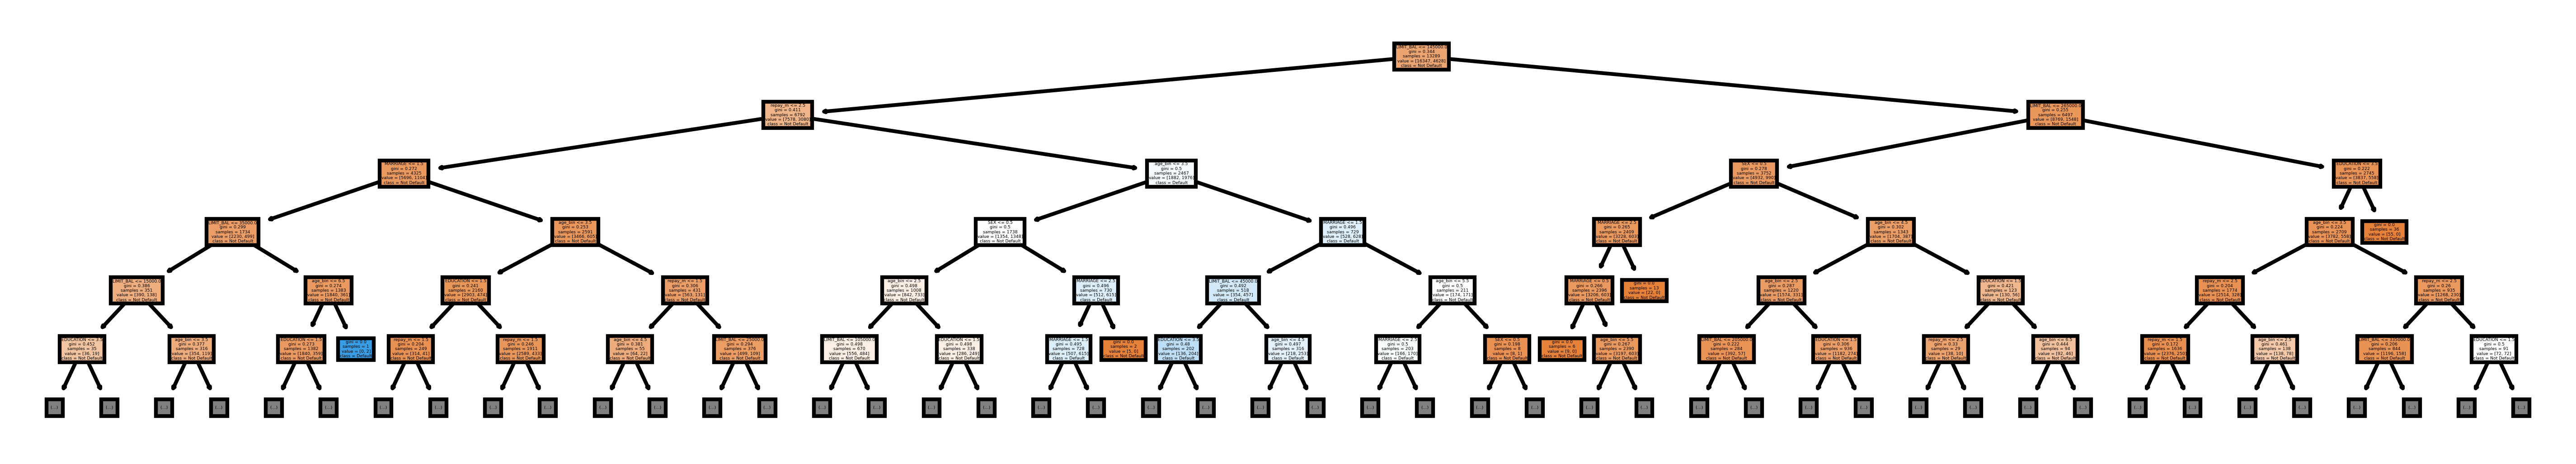

In [63]:
#Plotting

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,2), dpi=600)
tree = plot_tree(RFC_model.estimators_[0],
               feature_names = X.columns, 
               class_names=['Not Default', 'Default'],
               filled = True, max_depth=5)
fig.savefig('default0_repaym_77.tif')

In [64]:
corrMat = credit2.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000 -0.025015   0.245063 -0.108081   
SEX                         -0.025015  1.000000   0.008149  0.031372   
EDUCATION                    0.245063  0.008149   1.000000  0.146771   
MARRIAGE                    -0.108081  0.031372   0.146771  1.000000   
AGE                          0.144643  0.091057  -0.180376 -0.413901   
PAY_0                       -0.271576  0.057932  -0.132667  0.019977   
PAY_2                       -0.296302  0.070700  -0.154427  0.024181   
PAY_3                       -0.286000  0.065954  -0.147887  0.032641   
PAY_4                       -0.267300  0.060013  -0.139511  0.033074   
PAY_5                       -0.249216  0.054886  -0.125283  0.035585   
PAY_6                       -0.234972  0.043808  -0.114548  0.034298   
BILL_AMT1                    0.285877  0.033675   0.008181 -0.023505   
BILL_AMT2                    0.278753  0.031214   0.009096 -0.02

In [65]:
credit2_corr = credit2.drop(columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                                       'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                       'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                                       'age_bin','BillAMT_bin','PayAMT_bin','credit_bin',
                                       'repay_m','repay_s','PAY_s'])


In [66]:
corrMat = credit2_corr.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000 -0.025015   0.245063 -0.108081   
SEX                         -0.025015  1.000000   0.008149  0.031372   
EDUCATION                    0.245063  0.008149   1.000000  0.146771   
MARRIAGE                    -0.108081  0.031372   0.146771  1.000000   
AGE                          0.144643  0.091057  -0.180376 -0.413901   
default payment next month  -0.153871  0.039742  -0.065747 -0.024019   
BILL_AMT                     0.302512  0.025946   0.015095 -0.024541   
PAY_AMT                      0.353048  0.004882   0.086054 -0.011233   
PAY_m                       -0.316910  0.069822  -0.160846  0.035451   

                                 AGE  default payment next month  BILL_AMT  \
LIMIT_BAL                   0.144643                   -0.153871  0.302512   
SEX                         0.091057                    0.039742  0.025946   
EDUCATION                  -0.180376         

In [67]:
#features; set default payment as dependent variable and do classification machine learning
X = credit2.drop(['default payment next month','credit_bin','AGE'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,age_bin,BILL_AMT,PAY_AMT,PAY_m,repay_m,PAY_s,repay_s,BillAMT_bin,PayAMT_bin
0,20000,0,2,1,2,2,-1,-1,-2,-2,...,0,2,1284.000000,114.833333,-0.333333,2,-2,1,1,0
1,120000,0,2,2,-1,2,0,0,0,2,...,2000,2,2846.166667,833.333333,0.500000,3,3,2,1,0
2,90000,0,2,2,0,0,0,0,0,0,...,5000,3,16942.166667,1836.333333,0.000000,2,0,1,2,1
3,50000,0,2,1,0,0,0,0,0,0,...,1000,3,38555.666667,1398.000000,0.000000,2,0,1,2,1
4,50000,1,2,1,-1,0,-1,0,0,0,...,679,5,18223.166667,9841.500000,-0.333333,2,-2,1,2,2


In [68]:
y = credit2['default payment next month']

#Modeling
algos_Class = []  #creating an empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Classification
results = []
names = []

for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8144505010778175
Decision Tree Classifier 0.7239781808313802
Gradient Boosting Classifier 0.8197233216049068


In [69]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Modeling (Classification)
GBC_algo = GradientBoostingClassifier()
GBC_model = GBC_algo.fit(X_train, y_train)

#Predictions
preds = GBC_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7018
           1       0.65      0.37      0.48      1972

    accuracy                           0.82      8990
   macro avg       0.75      0.66      0.68      8990
weighted avg       0.80      0.82      0.80      8990



In [70]:
#Cross Validation
model = GradientBoostingClassifier()
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.81029132 0.82308771 0.82569083]
